In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


symbol = "GOOGL"
start_date = "2010-01-01"
end_date = "2020-12-31"

data = yf.download(symbol, start=start_date, end=end_date)

data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

print(len(data))
n_steps = 30
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data.values[i:i + n_steps])
    y.append(data.values[i + n_steps])

X, y = np.array(X), np.array(y)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%%**********************]  1 of 1 completed

2768
(2738, 30, 1) (2738, 1)



<ipython-input-1-d94c06206e09>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [2]:
X_train.shape

(2190, 30, 1)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, activation='tanh', input_shape=(X_train.shape[1:])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [4]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
69/69 [==============================] - 4s 15ms/step - loss: 0.0052
Epoch 2/10
69/69 [==============================] - 1s 9ms/step - loss: 8.6014e-04
Epoch 3/10
69/69 [==============================] - 0s 7ms/step - loss: 6.2712e-04
Epoch 4/10
69/69 [==============================] - 0s 7ms/step - loss: 5.0391e-04
Epoch 5/10
69/69 [==============================] - 0s 6ms/step - loss: 4.8431e-04
Epoch 6/10
69/69 [==============================] - 0s 6ms/step - loss: 4.2232e-04
Epoch 7/10
69/69 [==============================] - 0s 6ms/step - loss: 3.3845e-04
Epoch 8/10
69/69 [==============================] - 0s 6ms/step - loss: 3.2745e-04
Epoch 9/10
69/69 [==============================] - 0s 7ms/step - loss: 3.2735e-04
Epoch 10/10
69/69 [==============================] - 0s 6ms/step - loss: 3.1327e-04


18/18 [==============================] - 0s 4ms/step


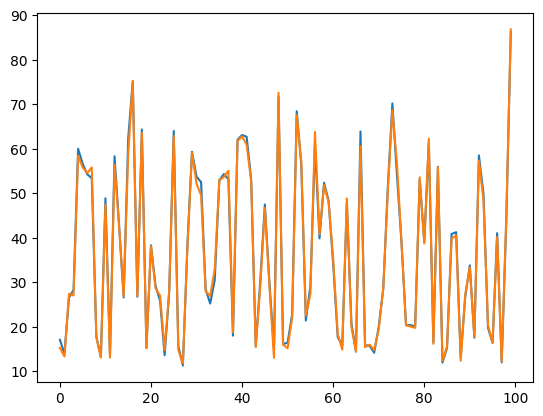

In [5]:
plt.plot(scaler.inverse_transform(model.predict(X_test)[:100]))
plt.plot(scaler.inverse_transform(y_test[:100]))

In [9]:
y_pred=scaler.inverse_transform(model.predict(X_test)[:100])
print(y_pred,y_test)

18/18 [==============================] - 0s 3ms/step
[[17.111843 ]
 [14.010914 ]
 [26.55872  ]
 [28.335815 ]
 [60.010223 ]
 [56.65919  ]
 [54.289066 ]
 [53.403023 ]
 [17.811392 ]
 [13.205023 ]
 [48.90414  ]
 [13.757442 ]
 [58.336296 ]
 [42.80424  ]
 [26.613153 ]
 [62.364925 ]
 [75.22254  ]
 [26.77337  ]
 [64.34517  ]
 [15.265817 ]
 [38.33724  ]
 [29.215332 ]
 [25.847174 ]
 [13.633398 ]
 [27.817087 ]
 [64.01191  ]
 [15.697825 ]
 [11.331654 ]
 [38.465996 ]
 [59.340816 ]
 [53.74464  ]
 [52.536728 ]
 [28.399857 ]
 [25.245646 ]
 [30.528143 ]
 [52.917614 ]
 [54.33829  ]
 [53.17169  ]
 [18.033058 ]
 [62.024963 ]
 [63.10924  ]
 [62.712875 ]
 [53.07829  ]
 [15.64541  ]
 [30.361334 ]
 [47.506435 ]
 [30.10191  ]
 [14.849247 ]
 [71.760994 ]
 [16.109621 ]
 [16.474087 ]
 [22.850302 ]
 [68.45178  ]
 [56.339363 ]
 [21.42251  ]
 [29.168873 ]
 [60.832256 ]
 [39.871815 ]
 [52.384106 ]
 [48.34667  ]
 [34.13044  ]
 [17.712189 ]
 [15.86152  ]
 [47.88079  ]
 [20.873013 ]
 [14.444982 ]
 [63.898293 ]
 [15.8956